✍ В данном юните мы разберём внутренние меры оценки качества кластеризации. После изучения предложенного материала вы будете иметь представление обо всех способах оценить качество кластеризации, если неизвестно эталонное разбиение на кластеры, а также будете знать, как вычислить наиболее важные показатели с помощью соответствующих алгоритмов sklearn.

В библиотеке sklearn реализованы три наиболее популярные метрики:

+ коэффициент силуэта (*Silhouette Coefficient*);
+ индекс Калински — Харабаса (*Calinski-Harabasz Index*);
+ индекс Дэвиса — Болдина (*Davies-Bouldin Index*).

Эти метрики мы рассмотрим максимально подробно, а также вычислим каждую из них «вручную». Важно отметить, что вам не потребуется в будущем реализовывать подобные вычисления самостоятельно, однако разбор вычислительных примеров поможет лучше разобраться в том, как рассчитываются значения и каков их смысл.

# **КОЭФФИЦИЕНТ СИЛУЭТА**

Некоторые внутренние меры вам уже знакомы по предыдущему модулю, например **коэффициент силуэта**. Мы не зря акцентируем на нём внимание — именно он используется чаще всего и именно о нём вас с наибольшей вероятностью могут спросить на собеседовании. Обсудим коэффициент силуэта немного подробнее.

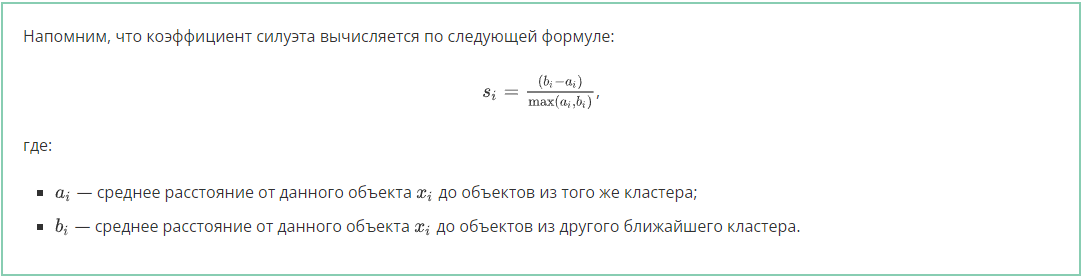

*Давайте рассмотрим вычисление коэффициента силуэта на примере.*

Допустим, у нас есть семь объектов, разделённых на три кластера.

+ Кластер 1:
 + $x_1(3,1)$;
 + $x_2(0,1)$;
 + $x_3(3,5)$;
+ Кластер 2:
 + $x_4(0,7)$;
 + $x_5(0,9)$;
+ Кластер 3:
 + $x_6(-12,1)$;
 + $x_7(-6,-7)$.


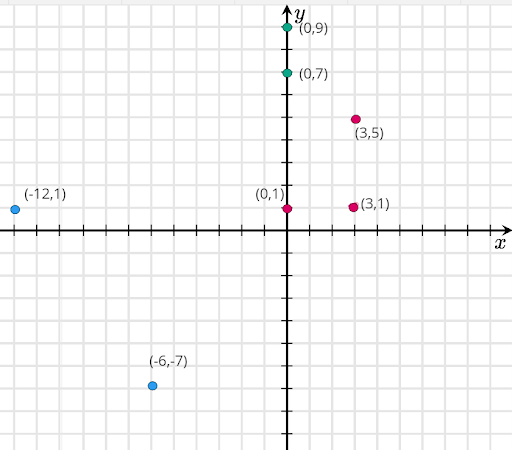

Найдём коэффициент силуэта для точки $x_2$. Для начала рассчитаем расстояния от точки $x_2$ до точек, принадлежащих её кластеру:

+ Расстояние от $x_2$ до $x_1$:

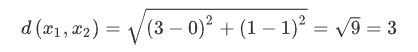


+ Расстояние от $x_2$ до $x_3$:

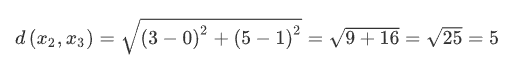

Теперь нам необходимо найти среднее арифметическое для этих расстояний:

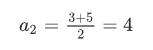

Далее нужно вычислить среднее расстояние от  до объектов из другого ближайшего кластера. Мы не можем сразу определить, какой кластер будет ближайшим, поэтому вычислим средние расстояния до обоих кластеров, а потом возьмём наименьшее.


Для начала найдём расстояния до элементов кластера 2:

+ от $x_2$ до $x_4$:

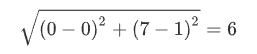

+ от $x_2$ до $x_5$:

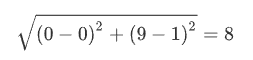

Среднее расстояние равно:

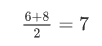

Теперь рассчитаем расстояния до элементов кластера 3:

+ от $x_2$ до $x_6$:

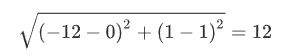

+ от $x_2$ до $x_7$:

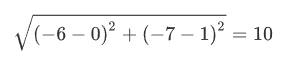

Среднее расстояние будет следующим:

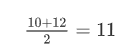

Среднее расстояние до кластера 2 меньше (7 < 11), так что будем использовать его.



Итак, рассчитаем коэффициент силуэта:

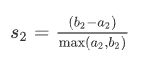

В данном случае $a_2 = 4$, $b_2 = 7$:

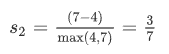

Отлично, мы нашли значение коэффициента силуэта для $x_2$. Для того чтобы найти итоговое значение коэффициента силуэта для выборки, необходимо найти значения для остальных шести объектов, а затем усреднить семь значений, однако мы опустим эти вычисления — надеемся, что алгоритм действий вам уже и так понятен.

При решении практических задач вы будете использовать уже готовые алгоритмы на Python. Для вычисления коэффициента силуэта в библиотеке sklearn используется silhouette_score:



```
#определяем алгоритм кластеризации
km = KMeans(n_clusters=3, random_state=42)
#обучаем его на наших данных
km.fit_predict(X)
#вычисляем значение коэффициента силуэта
score = silhouette_score(X, km.labels_, metric='euclidean')
```

Значение коэффициента силуэта всегда находится в диапазоне [−1,1].

+ Значение близко к −1: объекты в кластерах разрознены, и в целом кластерную структуру не удалось выделить.
+ Значение близко к 0: кластеры пересекаются друг с другом.
+ Значение близко к 1: чёткая кластерная структура с «плотными», отделёнными друг от друга кластерами.

Также мы можем изобразить распределение коэффициентов силуэта для объектов отдельных кластеров.

Например, визуализация для двух кластеров будет такой:

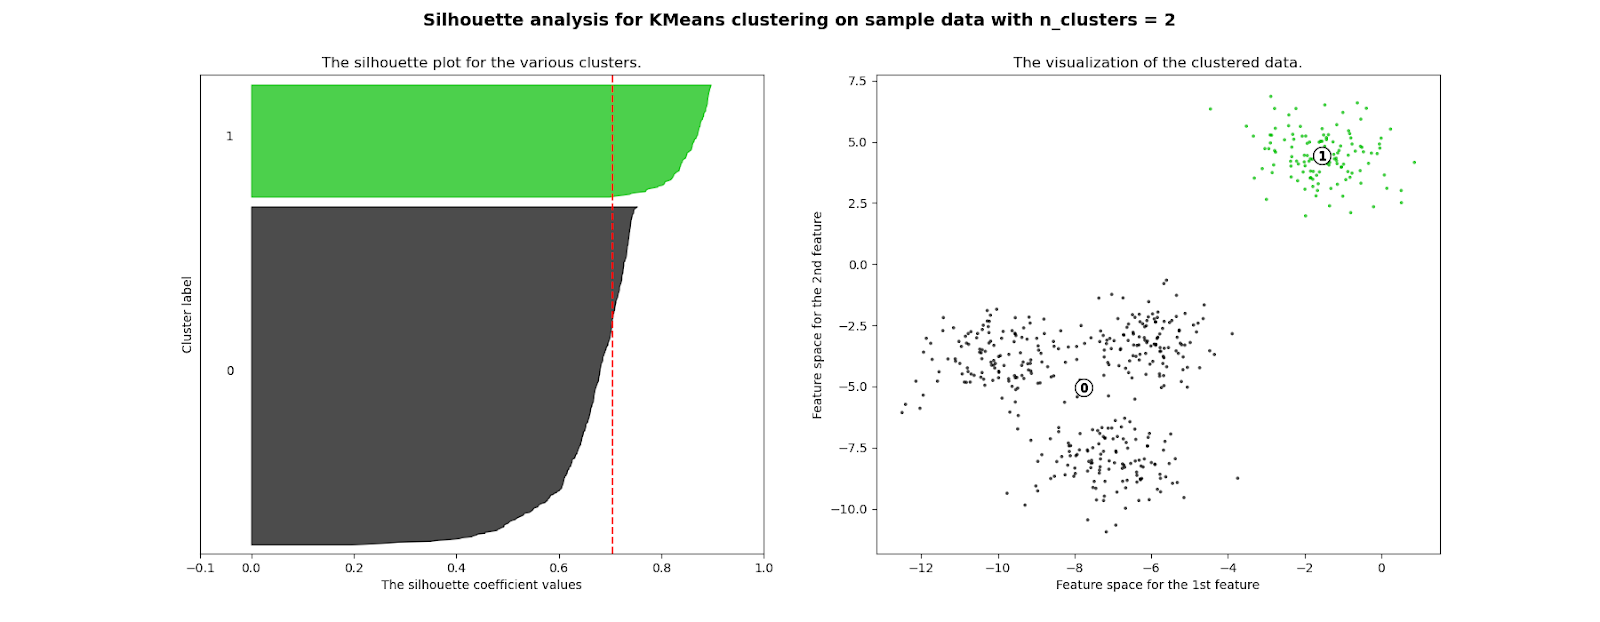

### Пояснение. На графике слева красной пунктирной линией здесь и далее отмечено среднее значение коэффициента силуэта для данного случая кластеризации. Разными цветами (серый и зелёный) визуализированы распределения значений коэффициентов силуэта для объектов соответствующих кластеров. На графике справа отмечены объекты, окрашенные в разные цвета в соответствии с их принадлежностью к кластерам.

Здесь мы видим, что «нулевой» кластер (серого цвета) включает в себя точки с более маленькими значениями. Это довольно хорошо соотносится с правой визуализацией, т. к. в сером кластере точки местами разрознены сильнее, чем в зелёном.

Для случая трёх кластеров ситуация будет следующей:

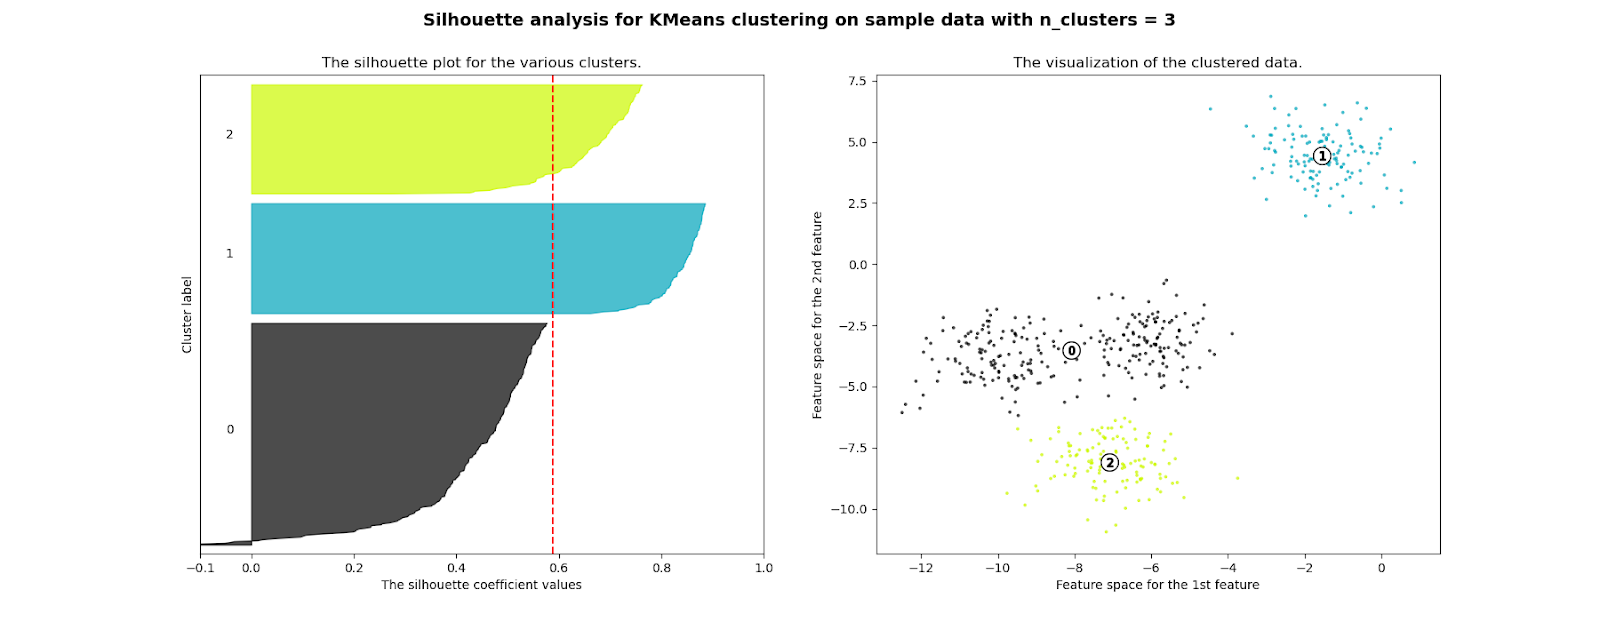

Довольно естественно (если посмотреть на график справа), что голубой кластер показывает наилучшую согласованность. У точек серого кластера коэффициенты всё так же самые низкие — явно напрашивается его разделение на ещё два кластера, и это действительно улучшает качество, так как значения коэффициентов силуэта увеличились (в новых сером и жёлтом кластерах они выше, чем были в предыдущем сером):

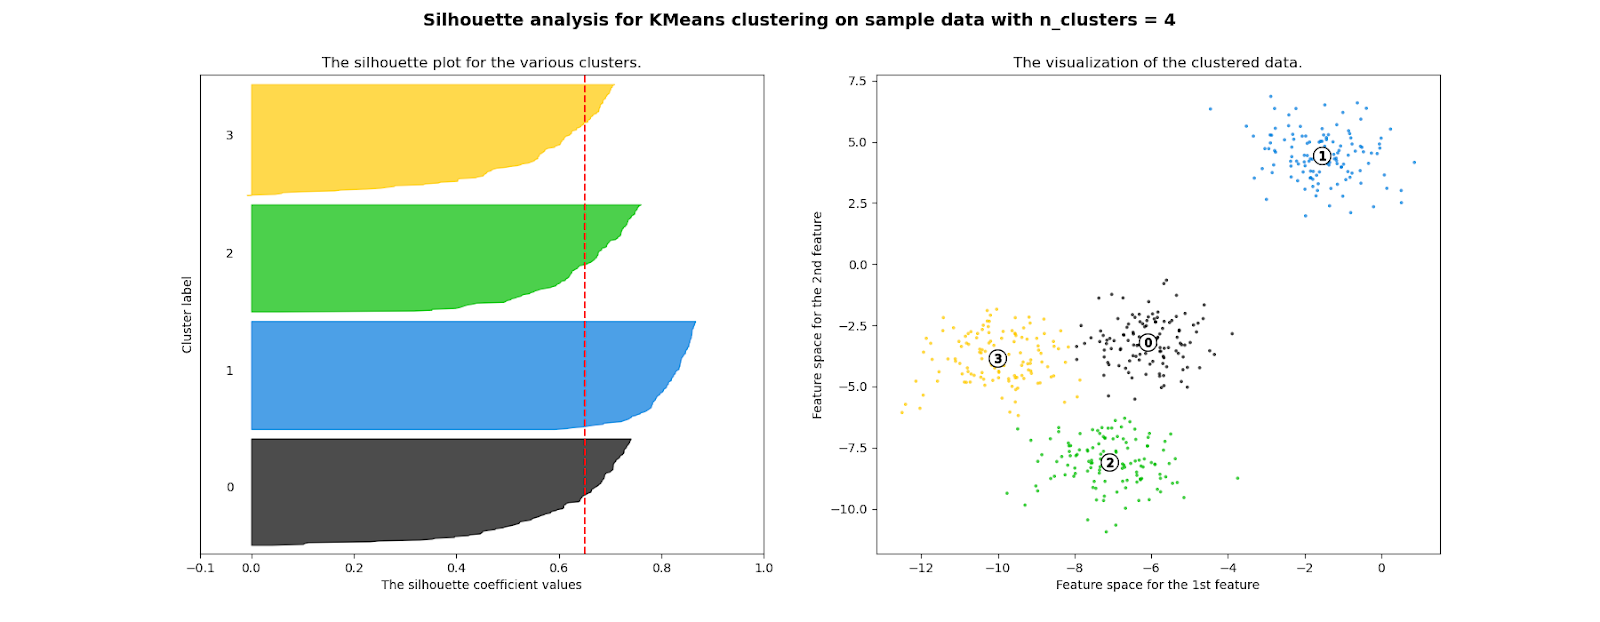




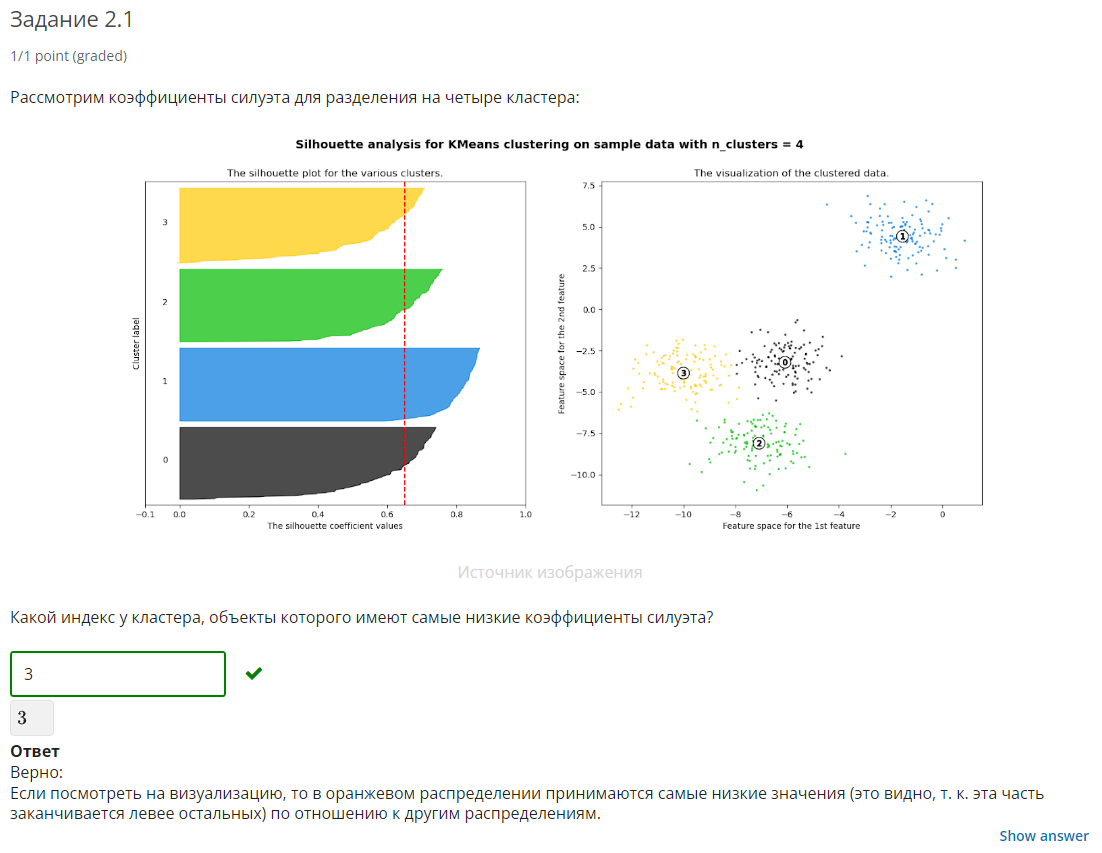

# **ИНДЕКС КАЛИНСКИ — ХАРАБАСА**

Следующий коэффициент, который мы рассмотрим, — это **индекс Калински — Харабаса**. Он показывает отношение между разбросом значений между кластерами и разбросом значений внутри кластеров и вычисляется по следующей формуле:

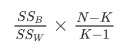

В данной формуле:

+ $N$ -  — общее количество объектов;
+ $K$ — количество кластеров;
+ $SS_B$ — взвешенная межкластерная сумма квадратов расстояний;
+ $SS_W$ — внутрикластерная сумма квадратов расстояний.
Несмотря на внешнюю лаконичность формулы, её довольно сложно применять. Чтобы лучше понять её компоненты, давайте рассмотрим нахождение индекса по шагам.

### Примечание. Важно отметить, что вам не потребуется вычислять данное значение «вручную» или моментально воспроизводить эту формулу по памяти: все вычисления так подробно мы приводим для того, чтобы вы лучше поняли принцип действия этой меры.

**Первый шаг** — рассчитать взвешенную межкластерную сумму квадратов расстояний:

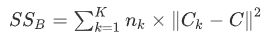

В данной формуле:

+ $n_k$ — количество наблюдений в кластере $k$;
+ $C_k$ — центроид кластера $k$;
+ $C$ — центроид всего набора данных;
+ $K$ — количество кластеров.

Вспомним пример, который мы рассматривали для вычисления коэффициента силуэта:

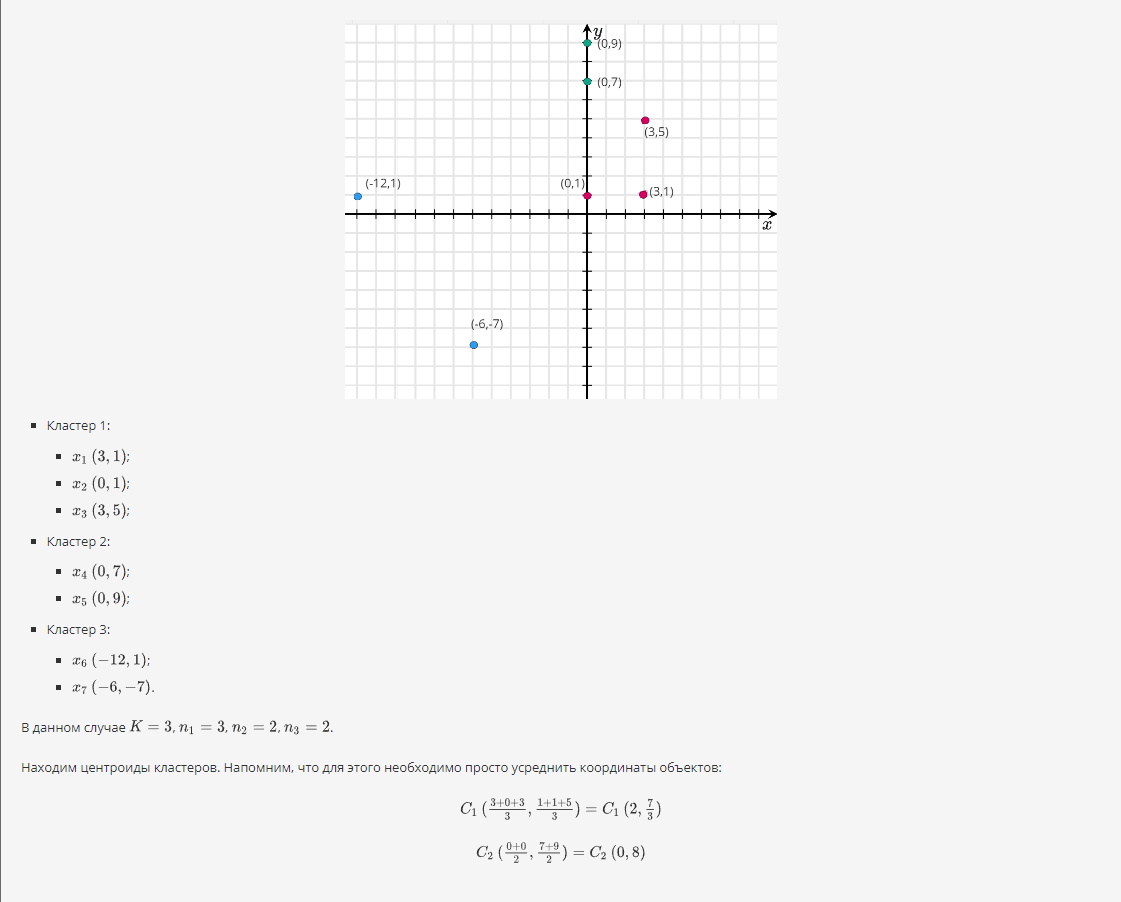

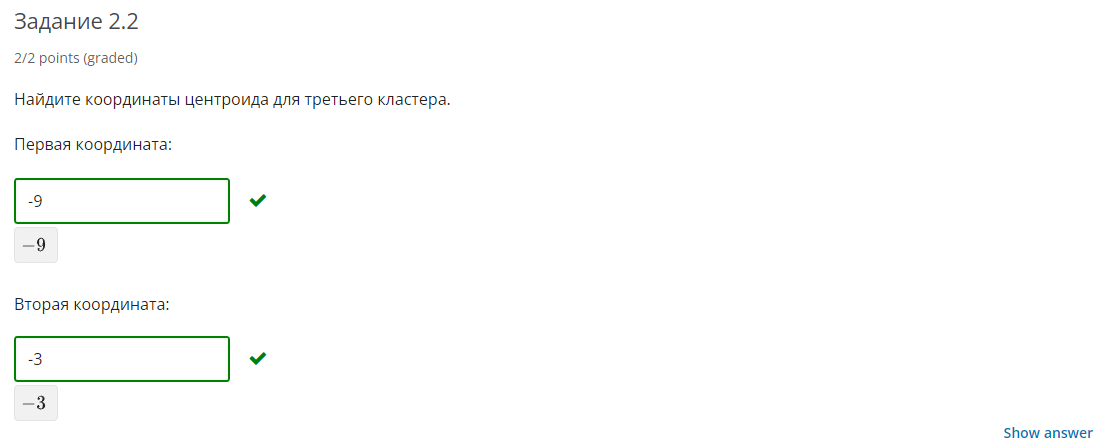
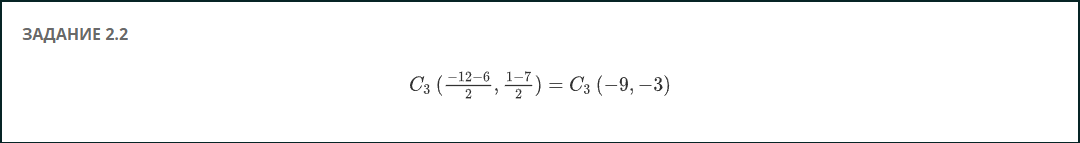

*Продолжение первого шага*

Вычислим центроид для всего набора данных:

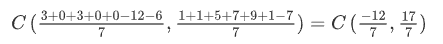

Далее необходимо рассчитать квадраты расстояний от центроидов кластеров до центроида данных:

+ Для первого кластера:

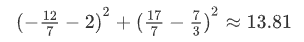

+ Для второго кластера:

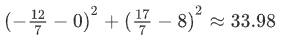

+ Для третьего кластера:

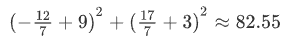

Теперь можно найти итоговый результат:

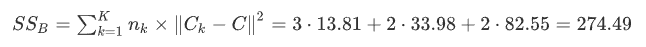

### **Обращаем ваше внимание**, что в процессе вычислений на некоторых шагах мы делали округление до сотых для компактности вычислений, однако при реализации в Python округления, разумеется, не производится.

**Второй шаг** — рассчитать внутрикластерную сумму квадратов.

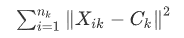

В данной формуле:

+ $n_k$ — количество наблюдений в кластере $k$;
+ $X_i(k)$ — $i$-ое наблюдение в кластере $k$;
+ $C_k$— центроид кластера $k$.

Такое значение мы рассчитываем для каждого кластера, а потом уже складываем их для получения значения $SS_W$. Итак, рассчитаем значения для каждого из трёх кластеров.

+ Для первого:

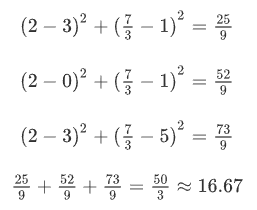

+ Для второго:

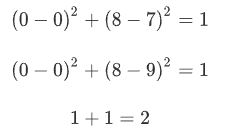

+ Для третьего:

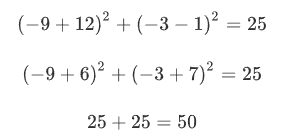

Складываем значения для всех кластеров:

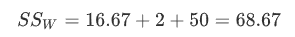

Теперь мы, наконец, можем вычислить значение индекса:

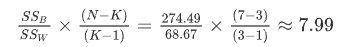

Важно отметить, что нет никакого «приемлемого» порогового значения индекса — скорее, его можно использовать для того, чтобы сравнивать разные разбиения на кластеры между собой: более высокое значение индекса будет означать, что кластеры плотные (т. е. объекты внутри них находятся близко друг к другу) и хорошо разделены. Например, если бы мы отразили зависимость показателя индекса от количества кластеров, то по графику ниже могли бы сделать вывод, что оптимальное количество кластеров будет равно трём, так как именно для этого числа кластеров значение индекса наибольшее:

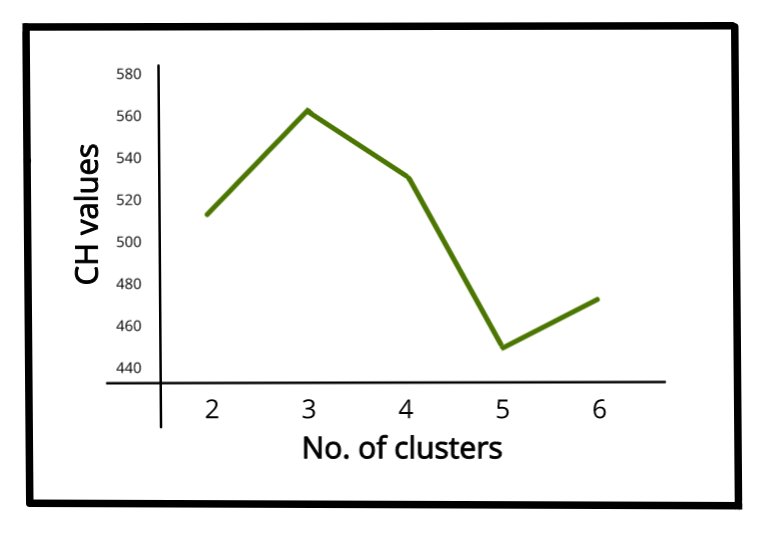

### **Пояснение:** по оси абсцисс здесь отложено количество кластеров, а по оси ординат — значение индекса Калински — Харабаса.

В библиотеке sklearn данный алгоритм реализуется с помощью метода calinski_harabasz_score():



```
#определяем алгоритм кластеризации
km = KMeans(n_clusters=3, random_state=42)
#обучаем его на наших данных
km.fit_predict(X)
#вычисляем значение коэффициента Калински — Харабаса
score = calinski_harabasz_score(X, km.labels_)
```



# **ИНДЕКС ДЭВИСА — БОЛДИНА**

Перейдём к последнему из трёх наиболее важных для нас коэффициентов — **индексу Дэвиса — Болдина**. Рассмотрим процесс его вычисления сразу по шагам, так как он реализуется достаточно сложно.

+ Первый шаг

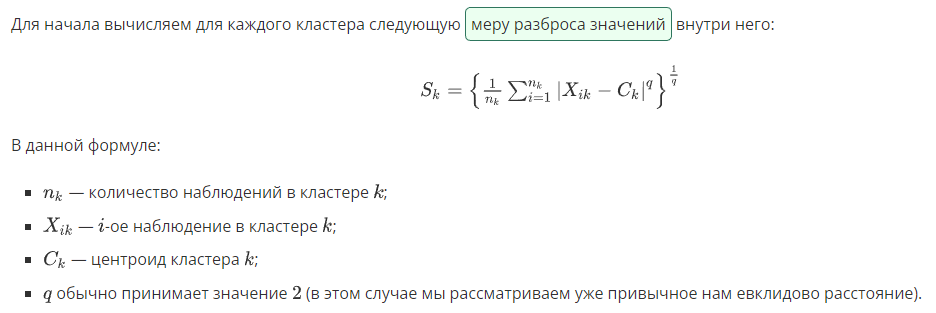

+ Второй шаг

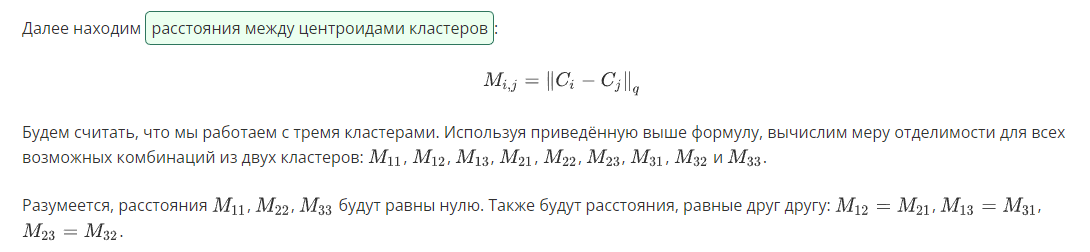

+ Третий шаг

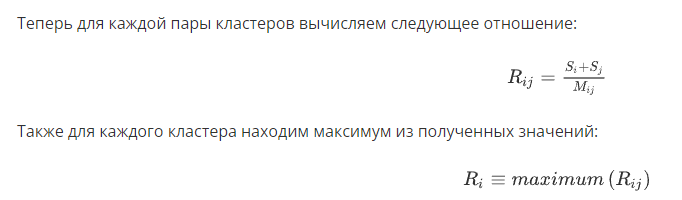

+ Четвёртый шаг

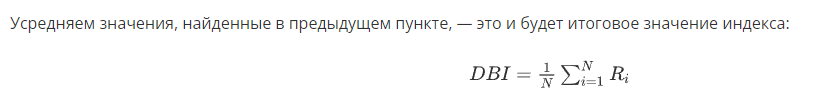

Давайте реализуем эти вычисления всё для того же примера, который мы использовали для вычисления предыдущих двух метрик. Напомним его.

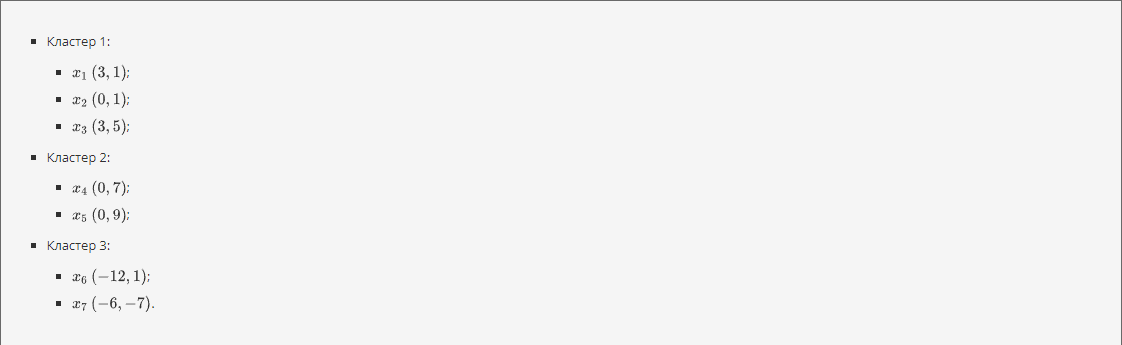



В первую очередь необходимо вычислить для каждого кластера значение компактности:

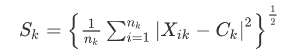

Мы уже вычислили часть этой формулы для всех кластеров, когда разбирали предыдущую меру (известная нам часть обведена в рамку):

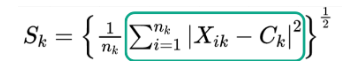

Так что воспользуемся этими значениями для нахождения значений компактности:

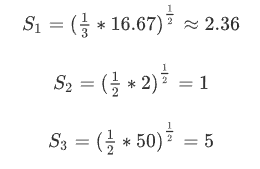

Теперь необходимо оценить отделимость — вычислить попарные расстояния между центроидами. У нас их будет всего три:

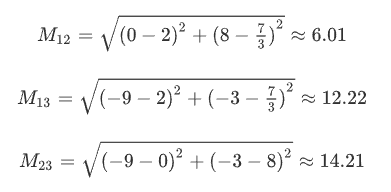

Далее вычисляем следующие промежуточные показатели:

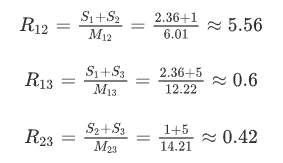

Находим из этих значений максимальное для каждого кластера:

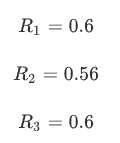

Теперь усредняем их для получения итогового результата:

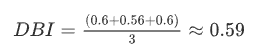

### Отлично, мы получили итоговое значение индекса.

### Давайте разберёмся, как интерпретировать значение коэффициента Дэвиса — Болдина. Индекс показывает среднюю «схожесть» между кластерами, и 0 — это минимально возможное значение. Разумеется, так как мы хотим, чтобы кластеры были максимально различными (т. е. имели низкую схожесть), мы должны пытаться достичь как можно более маленького значения.

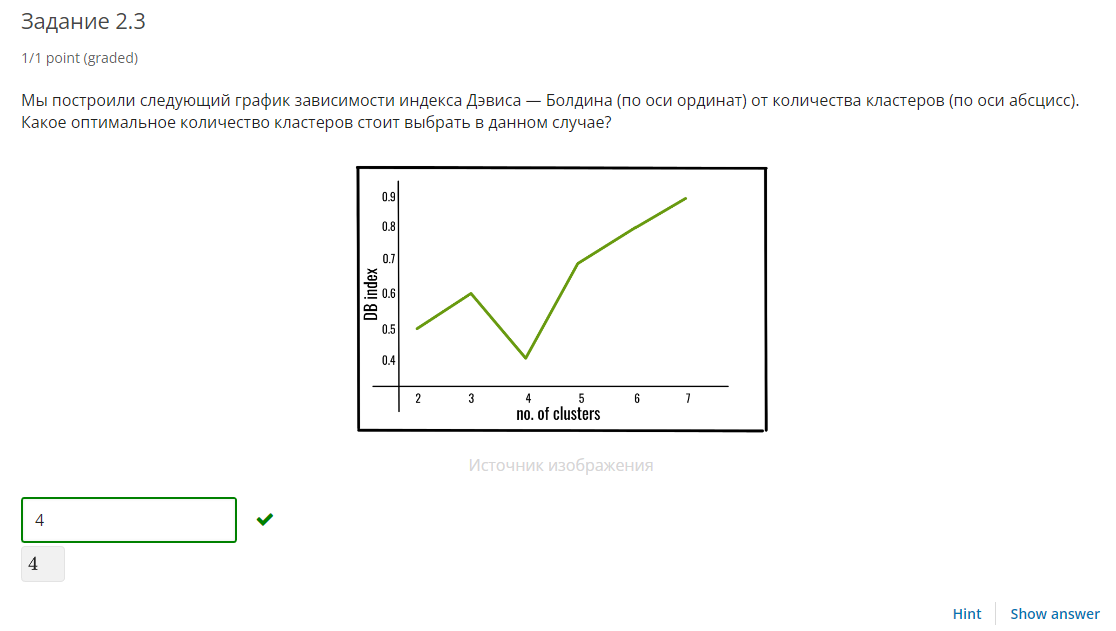

В библиотеке sklearn индекс Дэвиса — Болдина реализуется с помощью метода davies_bouldin_score():



```
#определяем алгоритм кластеризации
km = KMeans(n_clusters=3, random_state=42)
#обучаем его на наших данных
km.fit_predict(X)
#вычисляем значение коэффициента Дэвиса — Болдина
score = davies_bouldin_score(X, km.labels_)
```





Итак, мы рассмотрели три наиболее популярных метрики, которые обычно вычисляются при кластеризации и заложены в библиотеке sklearn. Однако есть ещё ряд показателей, с которыми вы можете столкнуться в различных источниках. Несмотря на то что они не реализованы в готовых библиотеках Python, о них часто упоминают, когда речь идёт об оценке качества кластеризации. Мы не будем подробно рассматривать вычисления для них, однако ознакомимся с их сутью, чтобы вы могли составить полную картину.

# **ВНУТРИКЛАСТЕРНОЕ РАССТОЯНИЕ**

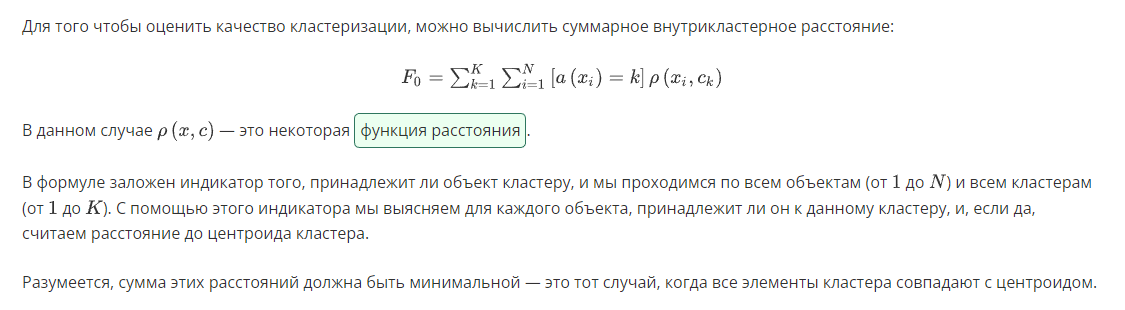

# **МЕЖКЛАСТЕРНОЕ РАССТОЯНИЕ**

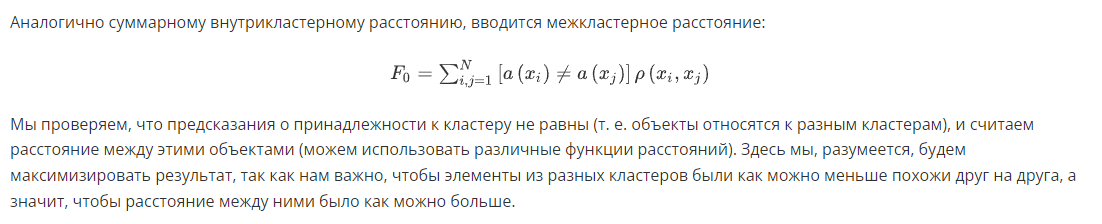

# **ОТНОШЕНИЕ РАССТОЯНИЙ**

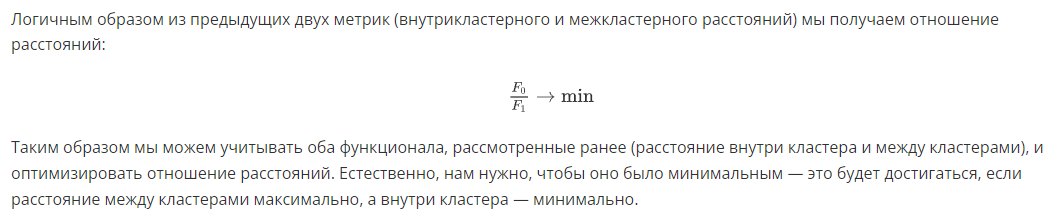

Итак, мы рассмотрели все основные внутренние меры для оценки качества кластеризации. Давайте сведём всё изученное в небольшую таблицу:

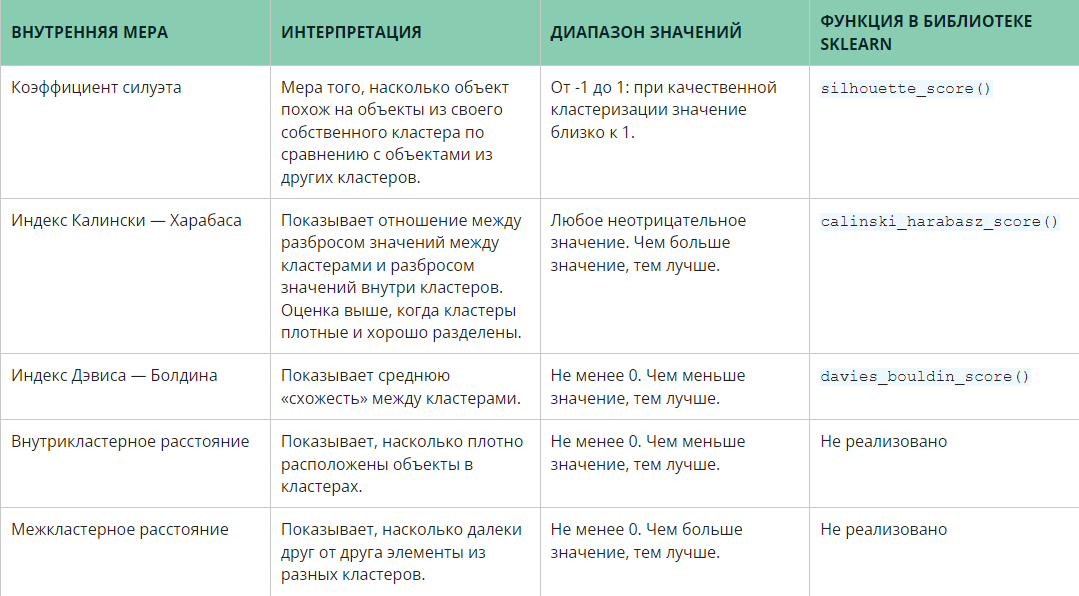

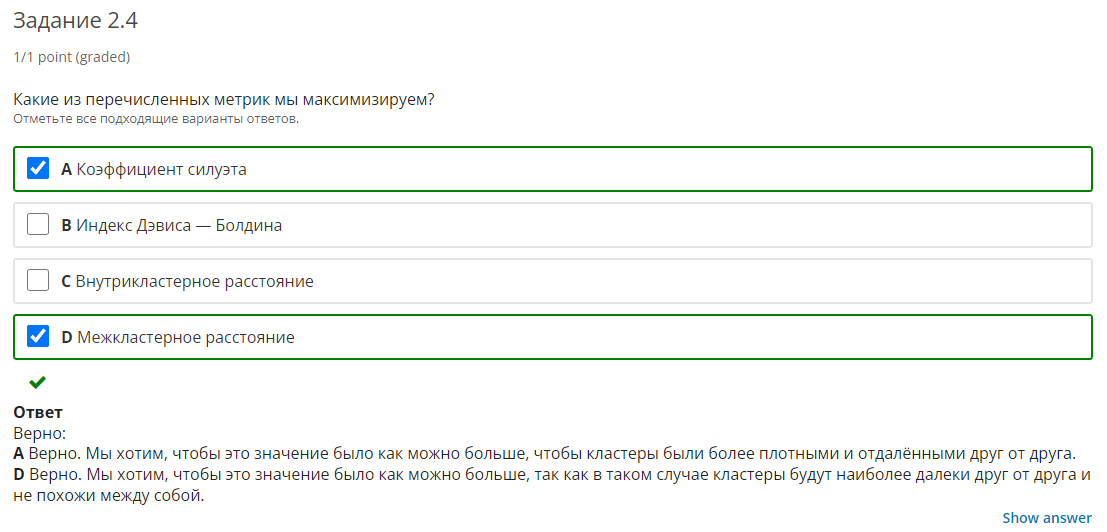

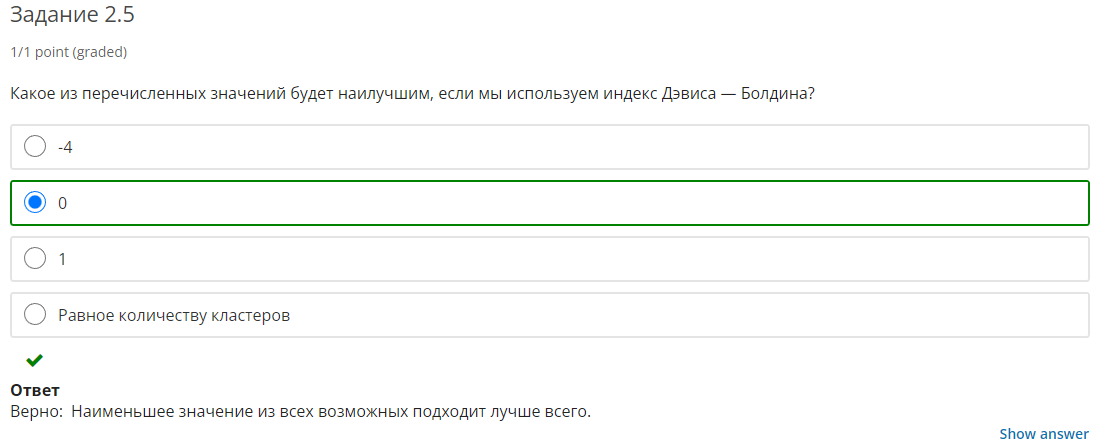

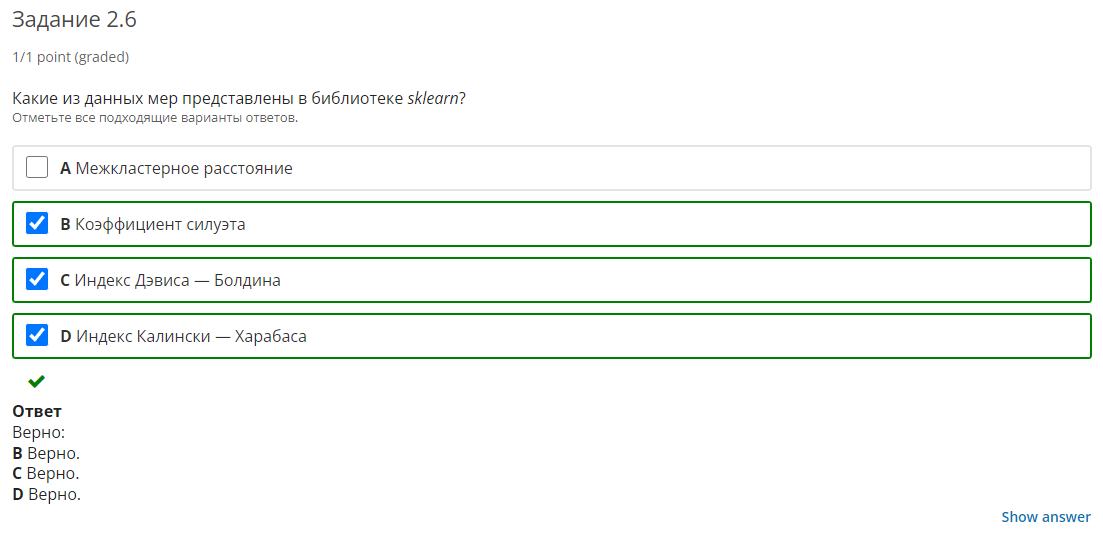

В следующем юните мы изучим внешние меры, которые используются в случае, когда известно эталонное разбиение на кластеры. После этого мы сравним различные алгоритмы кластеризации на примере практической задачи с использованием изученных мер →